In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [111]:
g = 9.81
L = 1

tmax = 100
t = np.linspace(0,tmax,1000)

theta0 = 10 * (np.pi/180)

r0 = np.array([0.,theta0])

def System(r,t):

    w, theta = r

    dwdt = ((((2*g)/L)-((w**2)*np.cos(theta)))*np.sin(theta))/((1/3)+((np.sin(theta))**2))
    dthetadt = w


    return [dwdt,dthetadt]

In [112]:
def Integrator2(f,r0,t):

    h = t[1] - t[0]

    w = np.zeros_like(t)
    theta = np.zeros_like(t)


    w[0] = r0[0]
    theta[0] = r0[1]


    K1 = np.zeros(2)
    K2 = np.zeros(2)

    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):

        R = np.array([w[i-1],theta[i-1]])

        K1 = f(R,t[i-1])

        R = np.array([w[i-1]+h*K1[0],theta[i-1]+h*K1[1]])

        K2 = f(R,t[i-1] + h)

        w[i] = w[i-1] + 0.5*h*(K1[0]+K2[0])
        theta[i] = theta[i-1] + 0.5*h*(K1[1]+K2[1])


    return w, theta

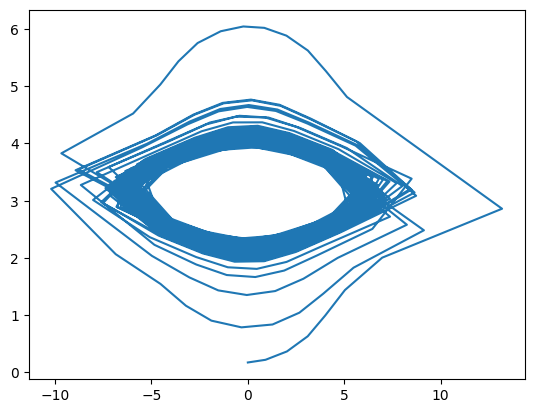

In [113]:
w,theta = Integrator2(System,r0,t)
r = integrate.odeint(System,r0,t)

plt.plot(w,theta)


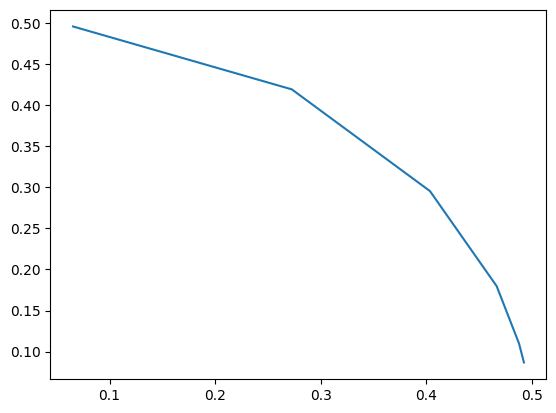

In [114]:
x0 = x[:len(y0)]
y = (L/2)*(np.cos(theta))
x = (L/2)*(np.sin(theta))


n = 0
for i in range(len(y)):
    if y[i]<0:
        n = i
        break
y0 = y[:n]
x0 = x[:len(y0)]
plt.plot(y0,x0)

tiempo que se demora en caer
en segundos

In [115]:
h =t[1]-t[0]
h*len(y0)

0.6006006006006006